# Test GEModelTools - HANK

This notebook shows how to **solve a simple Heterogenous Agent New Keynessian (HANK) model** using the `GEModelTools` package.

**The steps of the sequence-space solution method are:**

1. Find the stationary equilibrium (steady state for aggregates and distribution).
2. Compute Jacobians of the household block and the full model (to unknowns and shocks)
3. Find the non-linear transition path or the linearized impulse responses to a given shock path.
4. Simulate the linearized model with aggregate risk

# Imports

In [22]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
import sys
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
#np.set_printoptions(threshold=sys.maxsize)

from HANKmodel import HANKModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [23]:
#print(model)
model = HANKModelClass(name='baseline')
#model.print_unpack_varlist()

# Step 1: Steady state

In [24]:
model.find_ss(do_print=True)

steady state found in 12.3 secs
 Q   =   0.6691
 P   =   0.7573
 C Luxury low   =   0.3315
 C Luxury high   =   0.7232
 C Necessity low   =   0.1894
 C necessity high   =   0.2950
 p low   =   0.7573
 p high   =   0.7573
 Z_N   =   0.1903
 Z_L   =   0.6059
 M_N   =   0.3270
 M_L   =   0.1141
 N_L   =   0.6393
 N_N   =   0.5229
 HH_ell   =   1.1845
 wage N  =   0.3167
 wage L  =   0.4733
 par.varphi   =   0.8000
 par.beta   =   0.9860
Discrepancy in B =  -0.00000000
Discrepancy in C =   0.00000000
Discrepancy in C_L =   0.00000000
Discrepancy in C_N =   0.00000000
Discrepancy in N =  -0.00000000


In [25]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

Text(0, 0.5, '$c_{L,t}$')

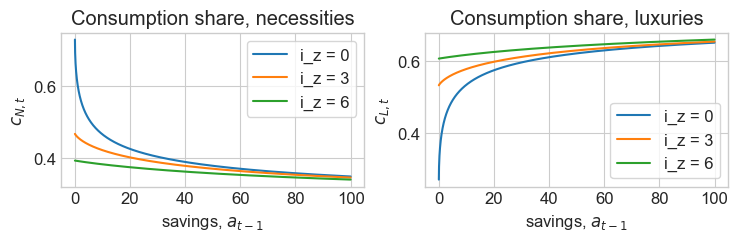

In [26]:
fig = plt.figure(figsize=(18,2),dpi=100)
a_max = 500

# a. necessity consumption share
I = par.a_grid < a_max

ax = fig.add_subplot(1,4,1)
ax.set_title(f'Consumption share, necessities')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c_N[0,i_z,I]/(ss.P*ss.c[0,i_z,I]),label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('$c_{N,t}$')

# a. luxury consumption share
I = par.a_grid < a_max

ax = fig.add_subplot(1,4,2)
ax.set_title(f'Consumption share, luxuries')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.Q*ss.c_L[0,i_z,I]/(ss.P*ss.c[0,i_z,I]),label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('$c_{L,t}$')

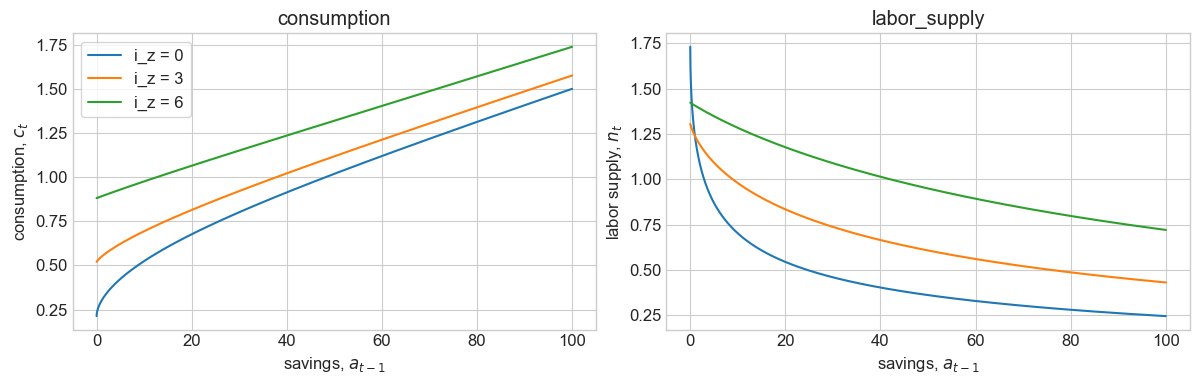

In [27]:
fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 500

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[0,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')

fig.tight_layout()

# Step 2: Compute Jacobians (incl. tests)

**Household transition path:**

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.8 secs
household problem simulated along transition in 0.1 secs



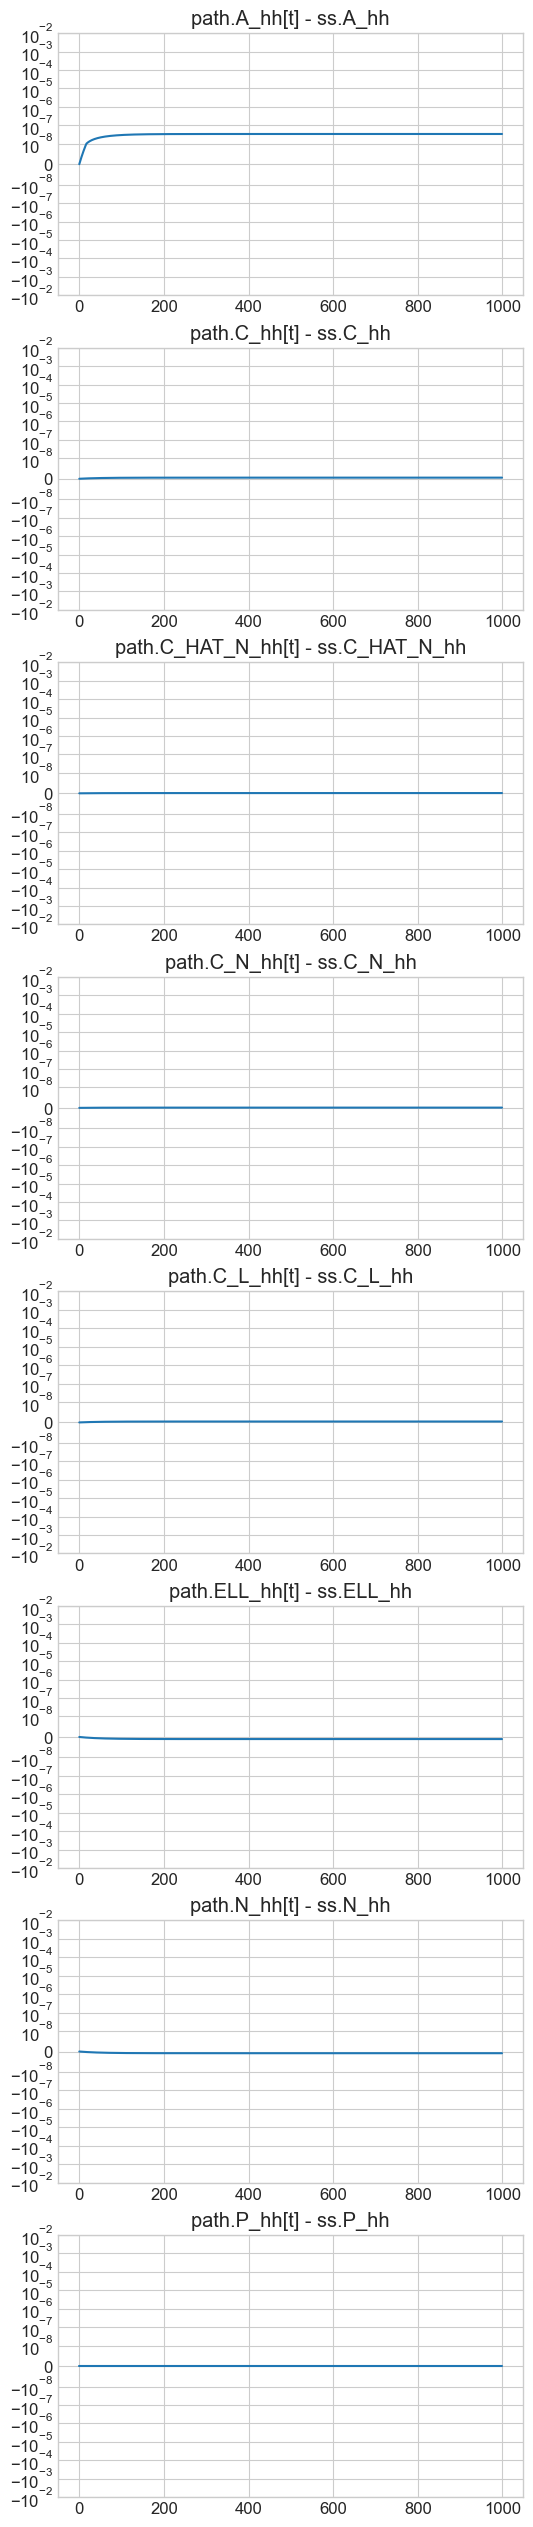

In [28]:
model.test_hh_path()

**Full transition path:**

In [29]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  0.0e+00, max abs.  0.0e+00
B              : t0 =  0.0e+00, max abs.  0.0e+00
C              : t0 =  0.0e+00, max abs.  0.0e+00
C_N            : t0 =  0.0e+00, max abs.  0.0e+00
C_L            : t0 =  0.0e+00, max abs.  0.0e+00
d_N            : t0 = -5.6e-17, max abs.  5.6e-17
d_L            : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
N              : t0 =  0.0e+00, max abs.  0.0e+00
N_N            : t0 =  0.0e+00, max abs.  0.0e+00
N_L            : t0 =  0.0e+00, max abs.  0.0e+00
M_N            : t0 = -5.6e-17, max abs.  5.6e-17
M_L            : t0 =  0.0e+00, max abs.  0.0e+00
pm_L           : t0 =  0.0e+00, max abs.  0.0e+00
pm_N           : t0 =  0.0e+00, max abs.  0.0e+00
pi             : t0 =  0.0e+00, max abs.  0.0e+00
pi_N           : t0

In [30]:
model.compute_jacs(do_print=True)
#model.test_jacs(s_list=[50,100,150])

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for P               in 1.2 secs
curly_Y and curly_D calculated for Q               in 1.3 secs
curly_Y and curly_D calculated for d_L             in 6.7 secs
curly_Y and curly_D calculated for d_N             in 1.6 secs
curly_Y and curly_D calculated for r               in 1.4 secs
curly_Y and curly_D calculated for tau             in 1.2 secs
curly_Y and curly_D calculated for w_N             in 1.3 secs
curly_E calculated in 0.3 secs
builiding blocks combined in 2.2 secs
household Jacobian computed in 17.2 secs

full Jacobians:
full Jacobian to unknowns computed in 41.4 secs [in evaluate_path(): 22.8 secs]
full Jacobian to shocks computed in 21.9 secs [in evaluate_path(): 12.8 secs]


# Step 3a: Find non-linear transition path

## Find transition path

In [31]:
model.find_transition_path(do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 2.86e-02
   9.66e-03 in NKPC_res_N
   8.47e-04 in NKPC_res_L
   2.86e-02 in clearing_A
   2.20e-03 in clearing_N
   7.99e-03 in clearing_C_N
 it =   1 -> max. abs. error = 4.92e-03
   3.06e-05 in NKPC_res_N
   1.34e-04 in NKPC_res_L
   3.01e-03 in clearing_A
   4.92e-03 in clearing_N
   1.18e-03 in clearing_C_N
 it =   2 -> max. abs. error = 1.05e-03
   8.46e-05 in NKPC_res_N
   2.13e-05 in NKPC_res_L
   4.02e-04 in clearing_A
   1.05e-03 in clearing_N
   6.09e-05 in clearing_C_N
 it =   3 -> max. abs. error = 7.62e-05
   3.96e-06 in NKPC_res_N
   3.79e-06 in NKPC_res_L
   7.34e-05 in clearing_A
   7.62e-05 in clearing_N
   5.10e-06 in clearing_C_N
 it =   4 -> max. abs. error = 7.46e-06
   3.96e-07 in NKPC_res_N
   2.47e-07 in NKPC_res_L
   2.12e-06 in clearing_A
   7.46e-06 in clearing_N
   1.60e-06 in clearing_C_N
 it =   5 -> max. abs. error = 1.86e-07
   4.56e-08 in NKPC_res_N
   9.98e-09 in NKPC_res_L
   1.55e-07 in clea

## Plot transitions

### shocks ###


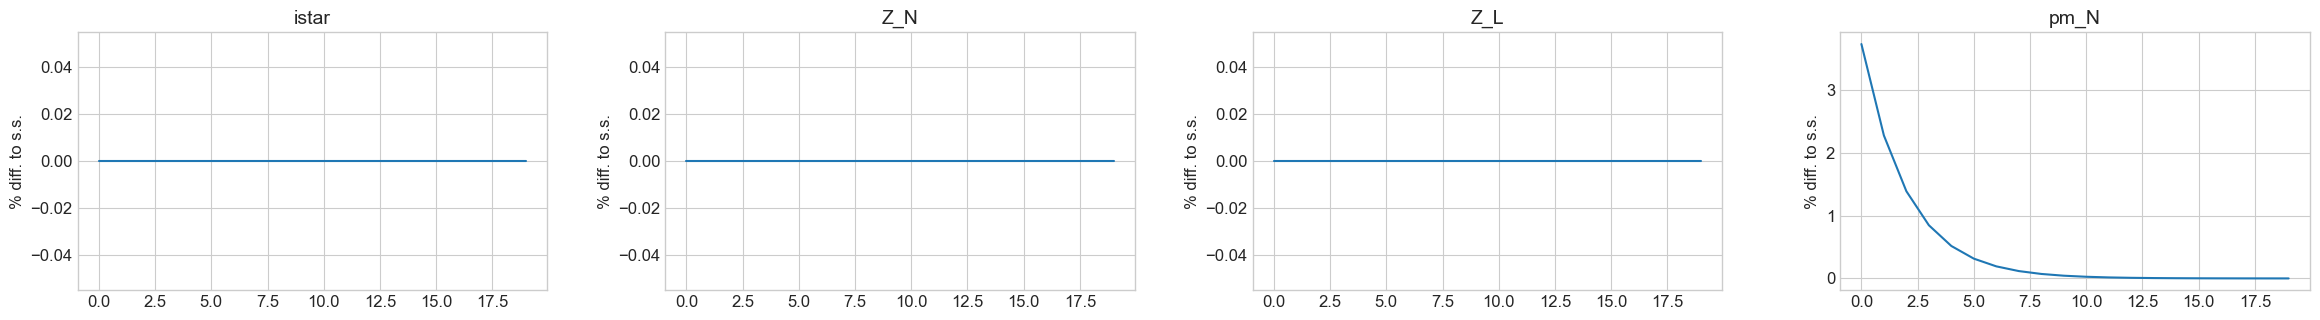


### varnames ###


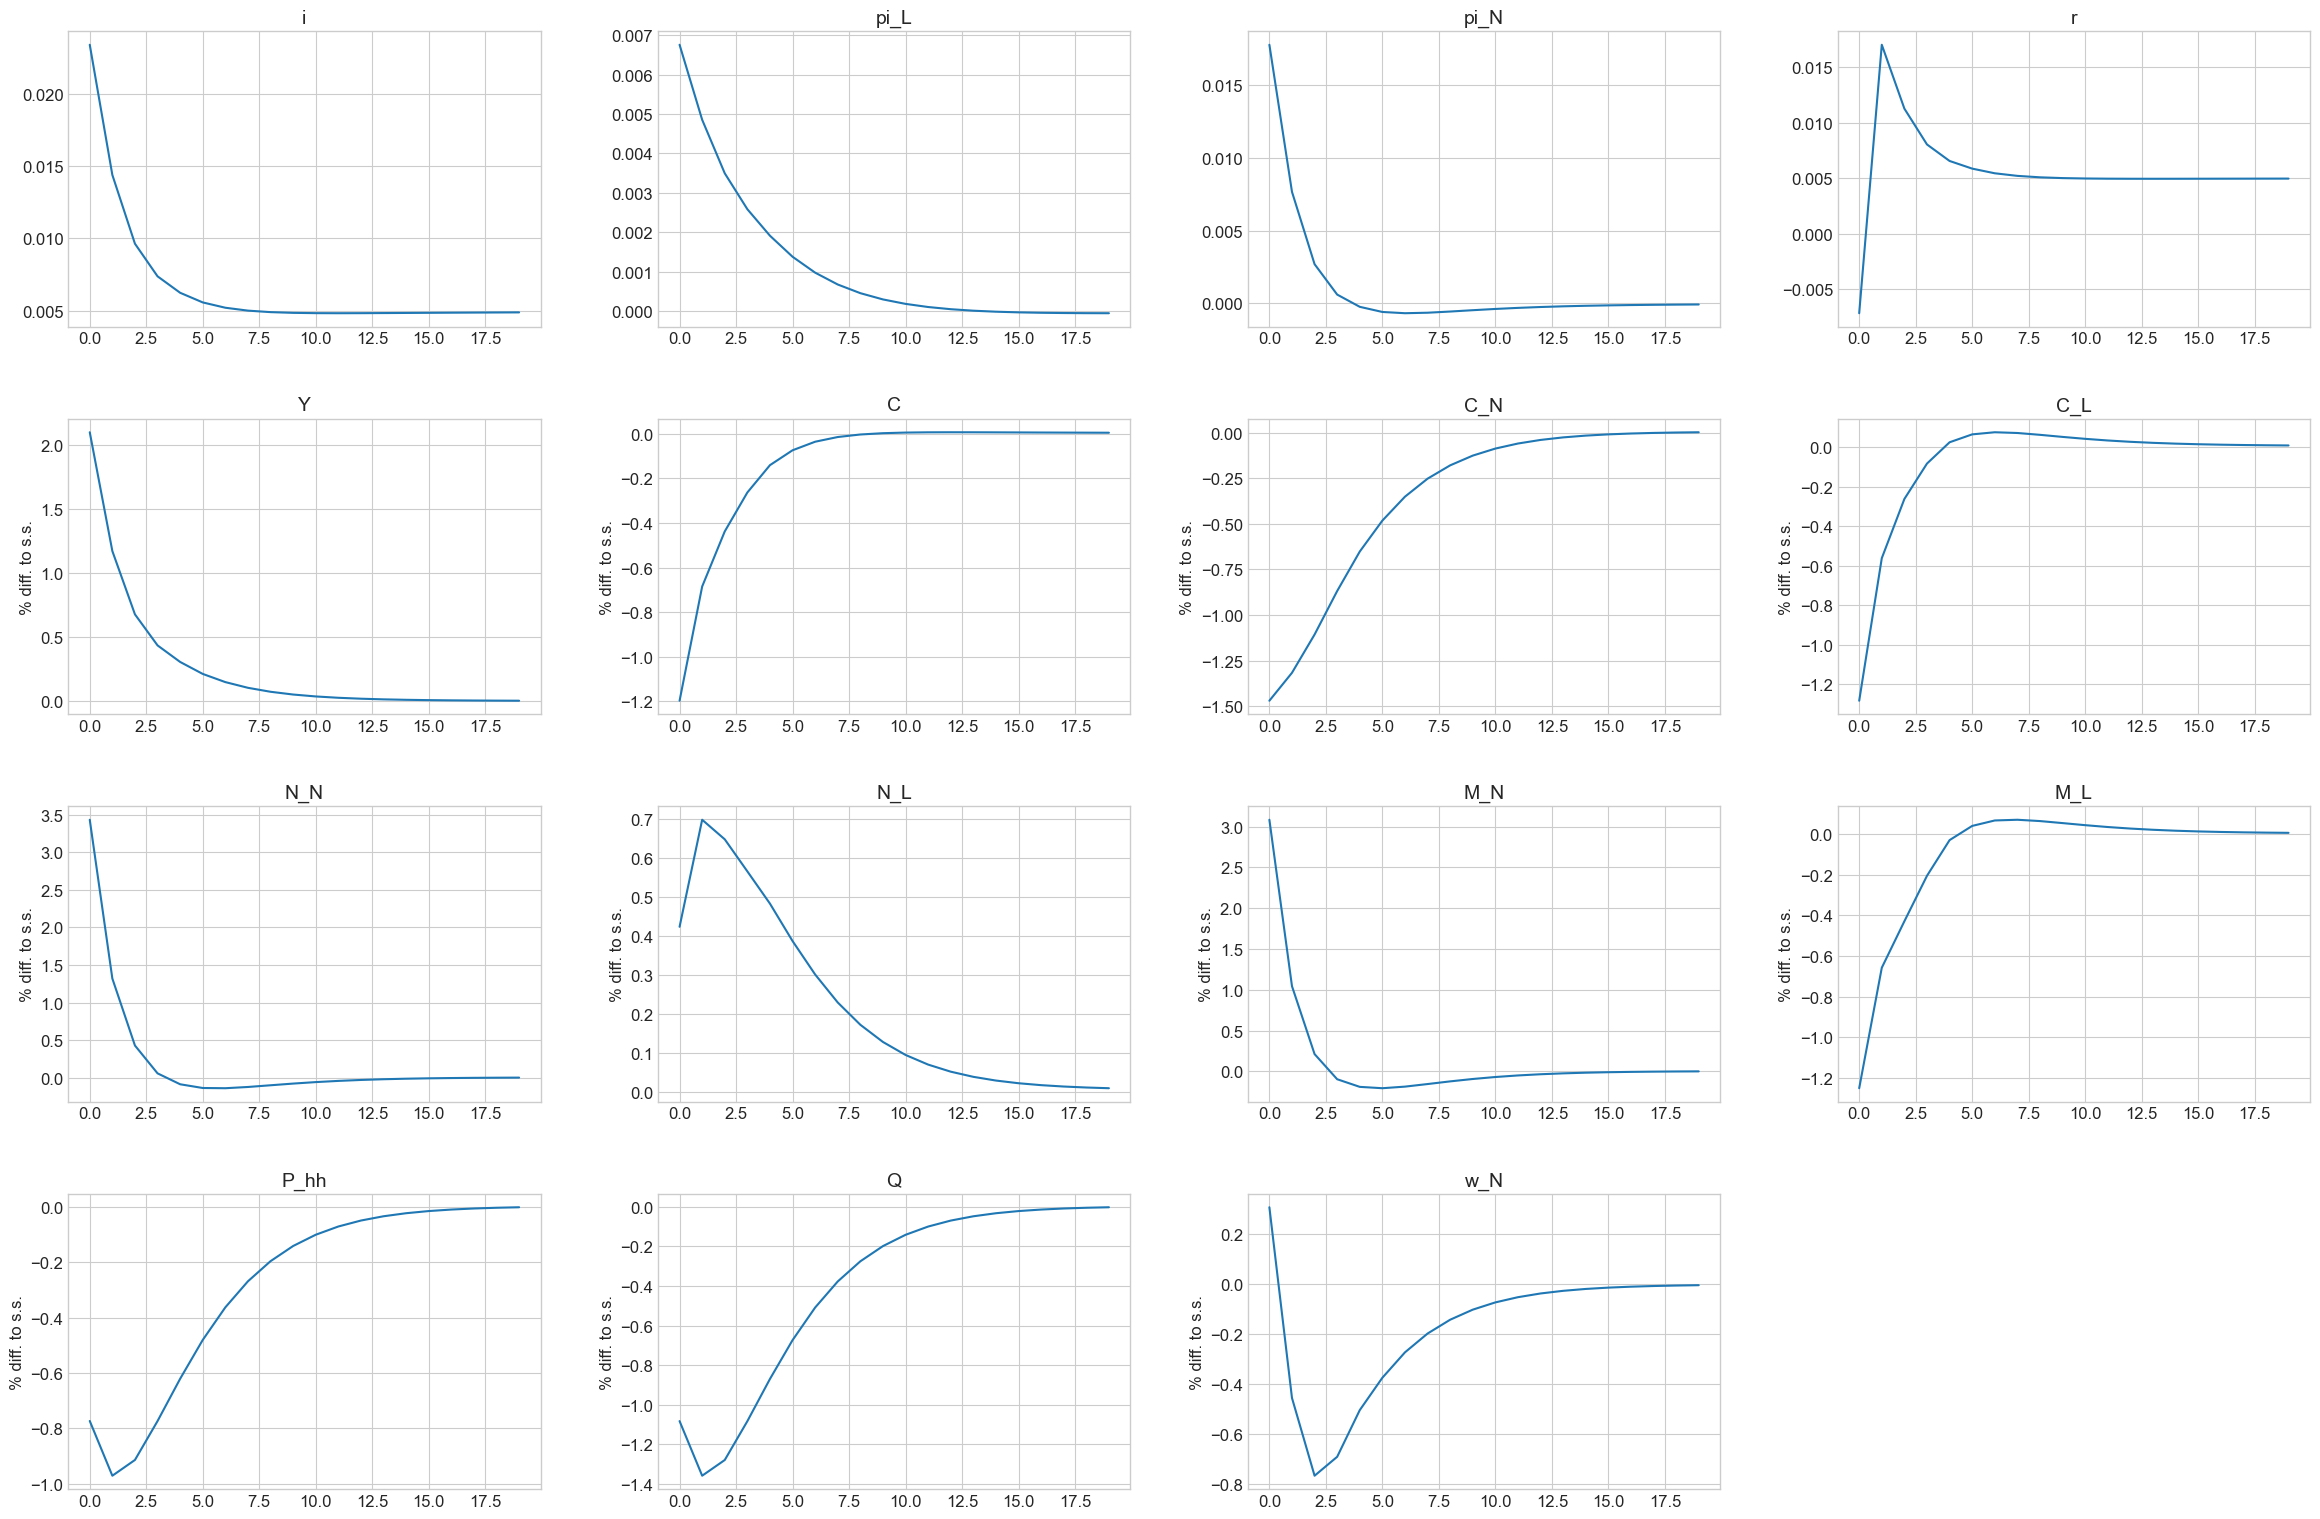


### tagets ###


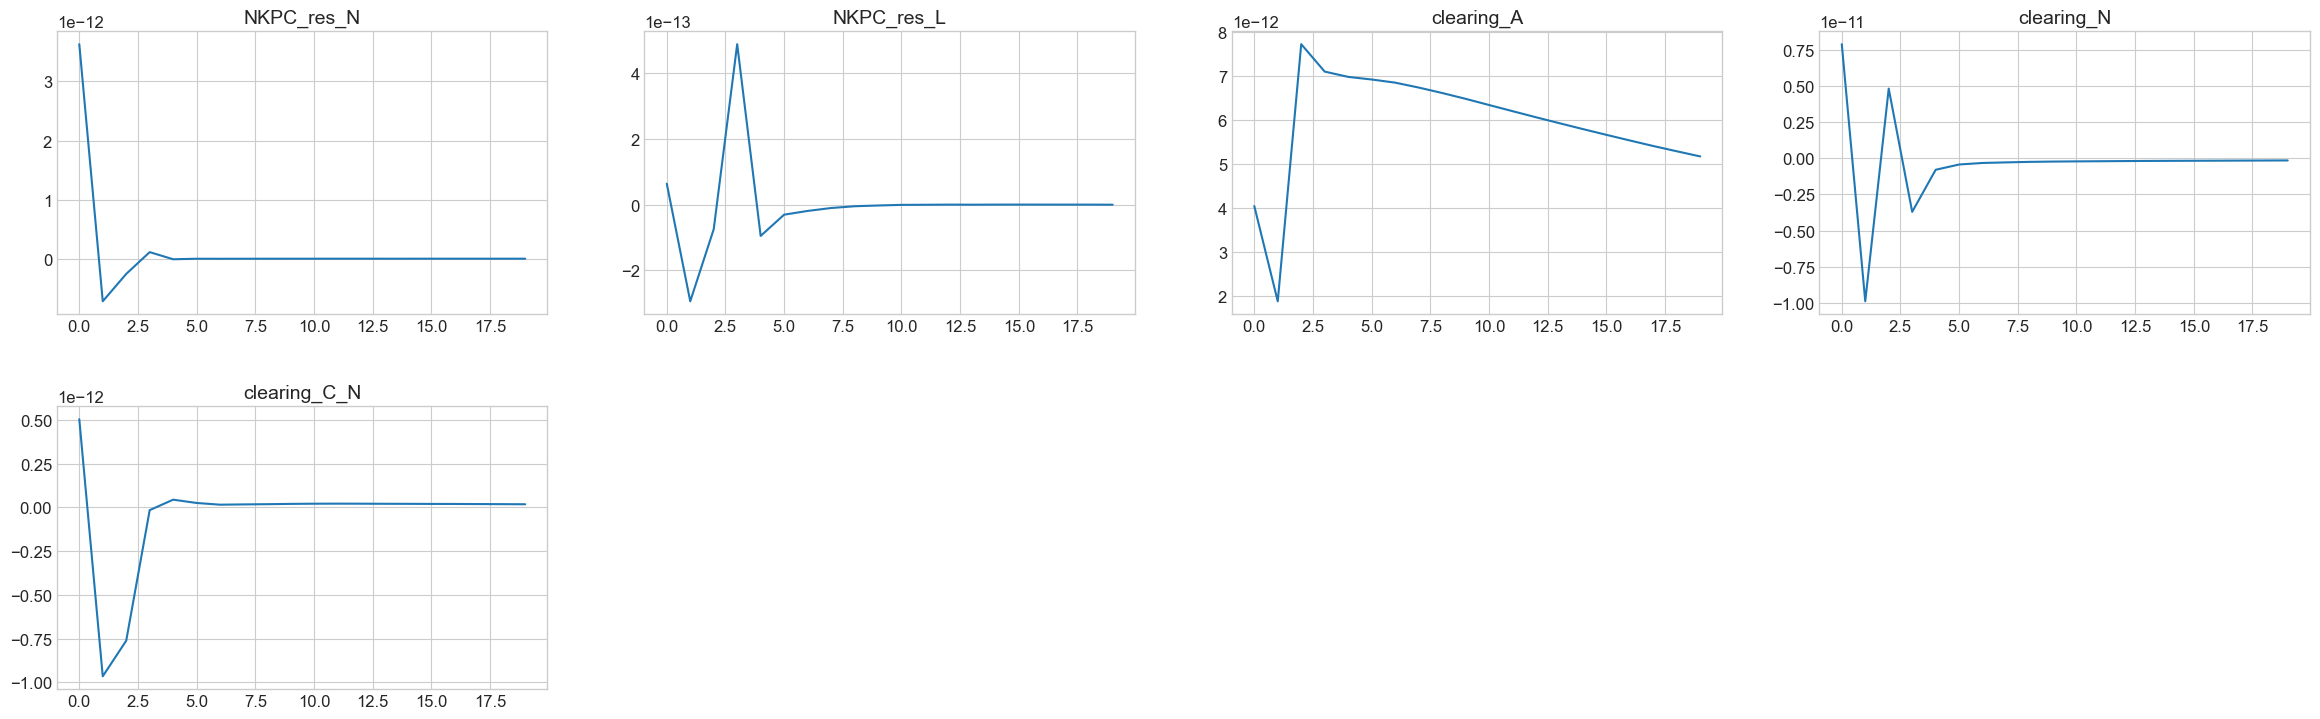

In [51]:
paths = ['i','pi_L','pi_N','r','Y','C','C_N','C_L','N_N','N_L','M_N','M_L','P_hh','Q','w_N']
lvl_value = ['i','pi_L','pi_N','r']
model.show_IRFs(paths,lvl_value=lvl_value,T_max=20,ncols=4)

# Step 3b: Find linearized IRFs

In [33]:
par.jump_pm_N = 0.025
model.find_IRFs(do_print=True)

linear transition path found in 2.3 secs [finding solution matrix: 2.0 secs]


In [34]:
MPC = np.zeros(ss.D.shape)
m_diff = (1+ss.r)*par.a_grid[np.newaxis,np.newaxis,1:]-(1+model.ss.r)*par.a_grid[np.newaxis,np.newaxis,:-1]
MPC[:,:,:-1] = (ss.c[:,:,1:]-ss.c[:,:,:-1])/m_diff
MPC[:,:,-1] = MPC[:,:,-1] # assuming constant MPC at end
mean_MPC = np.sum(MPC*ss.D)
mean_MPC_ann = 1-(1-mean_MPC)**4
print(f'mean MPC: {mean_MPC:.3f} [annual: {mean_MPC_ann:.3f}]')

mean MPC: 0.085 [annual: 0.298]


In [45]:
#model.path.P_hh[0,:]
print(f' C Luxury low   = {np.average(ss.c_L[0,0]):8.4f}')
print(f' C Luxury high   = {np.average(ss.c_L[0,6]):8.4f}')
print(f' C Necessity low   = {np.average(ss.c_N[0,0]):8.4f}')
print(f' C necessity high   = {np.average(ss.c_N[0,6]):8.4f}')
print(f' p low   = {np.average(ss.p[0,0]):8.4f}')
print(f' p high   = {np.average(ss.p[0,6]):8.4f}')

 C Luxury low   =   0.3315
 C Luxury high   =   0.7232
 C Necessity low   =   0.1894
 C necessity high   =   0.2950
 p low   =   0.7573
 p high   =   0.7573


### shocks ###


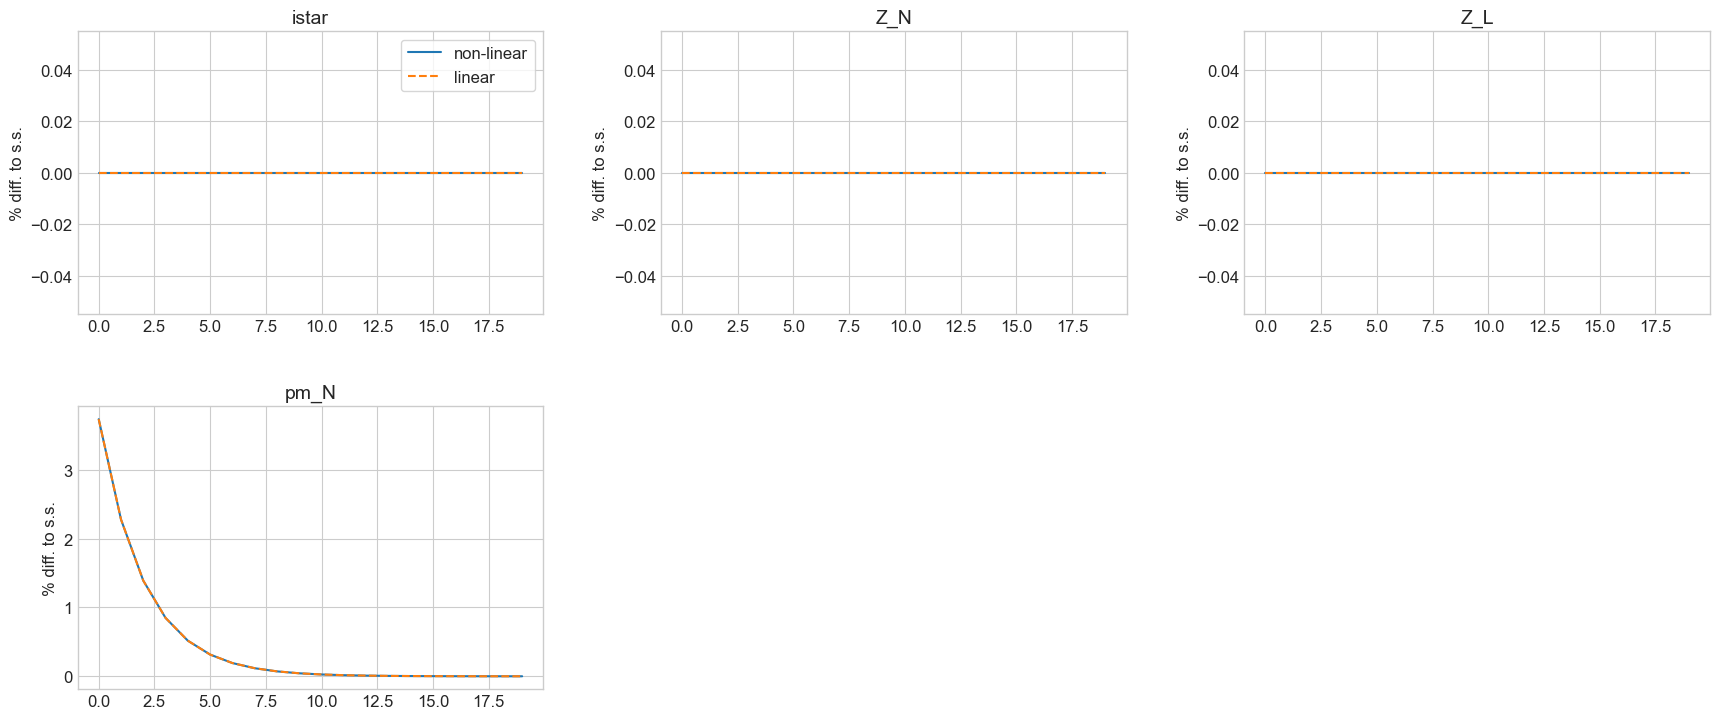


### varnames ###


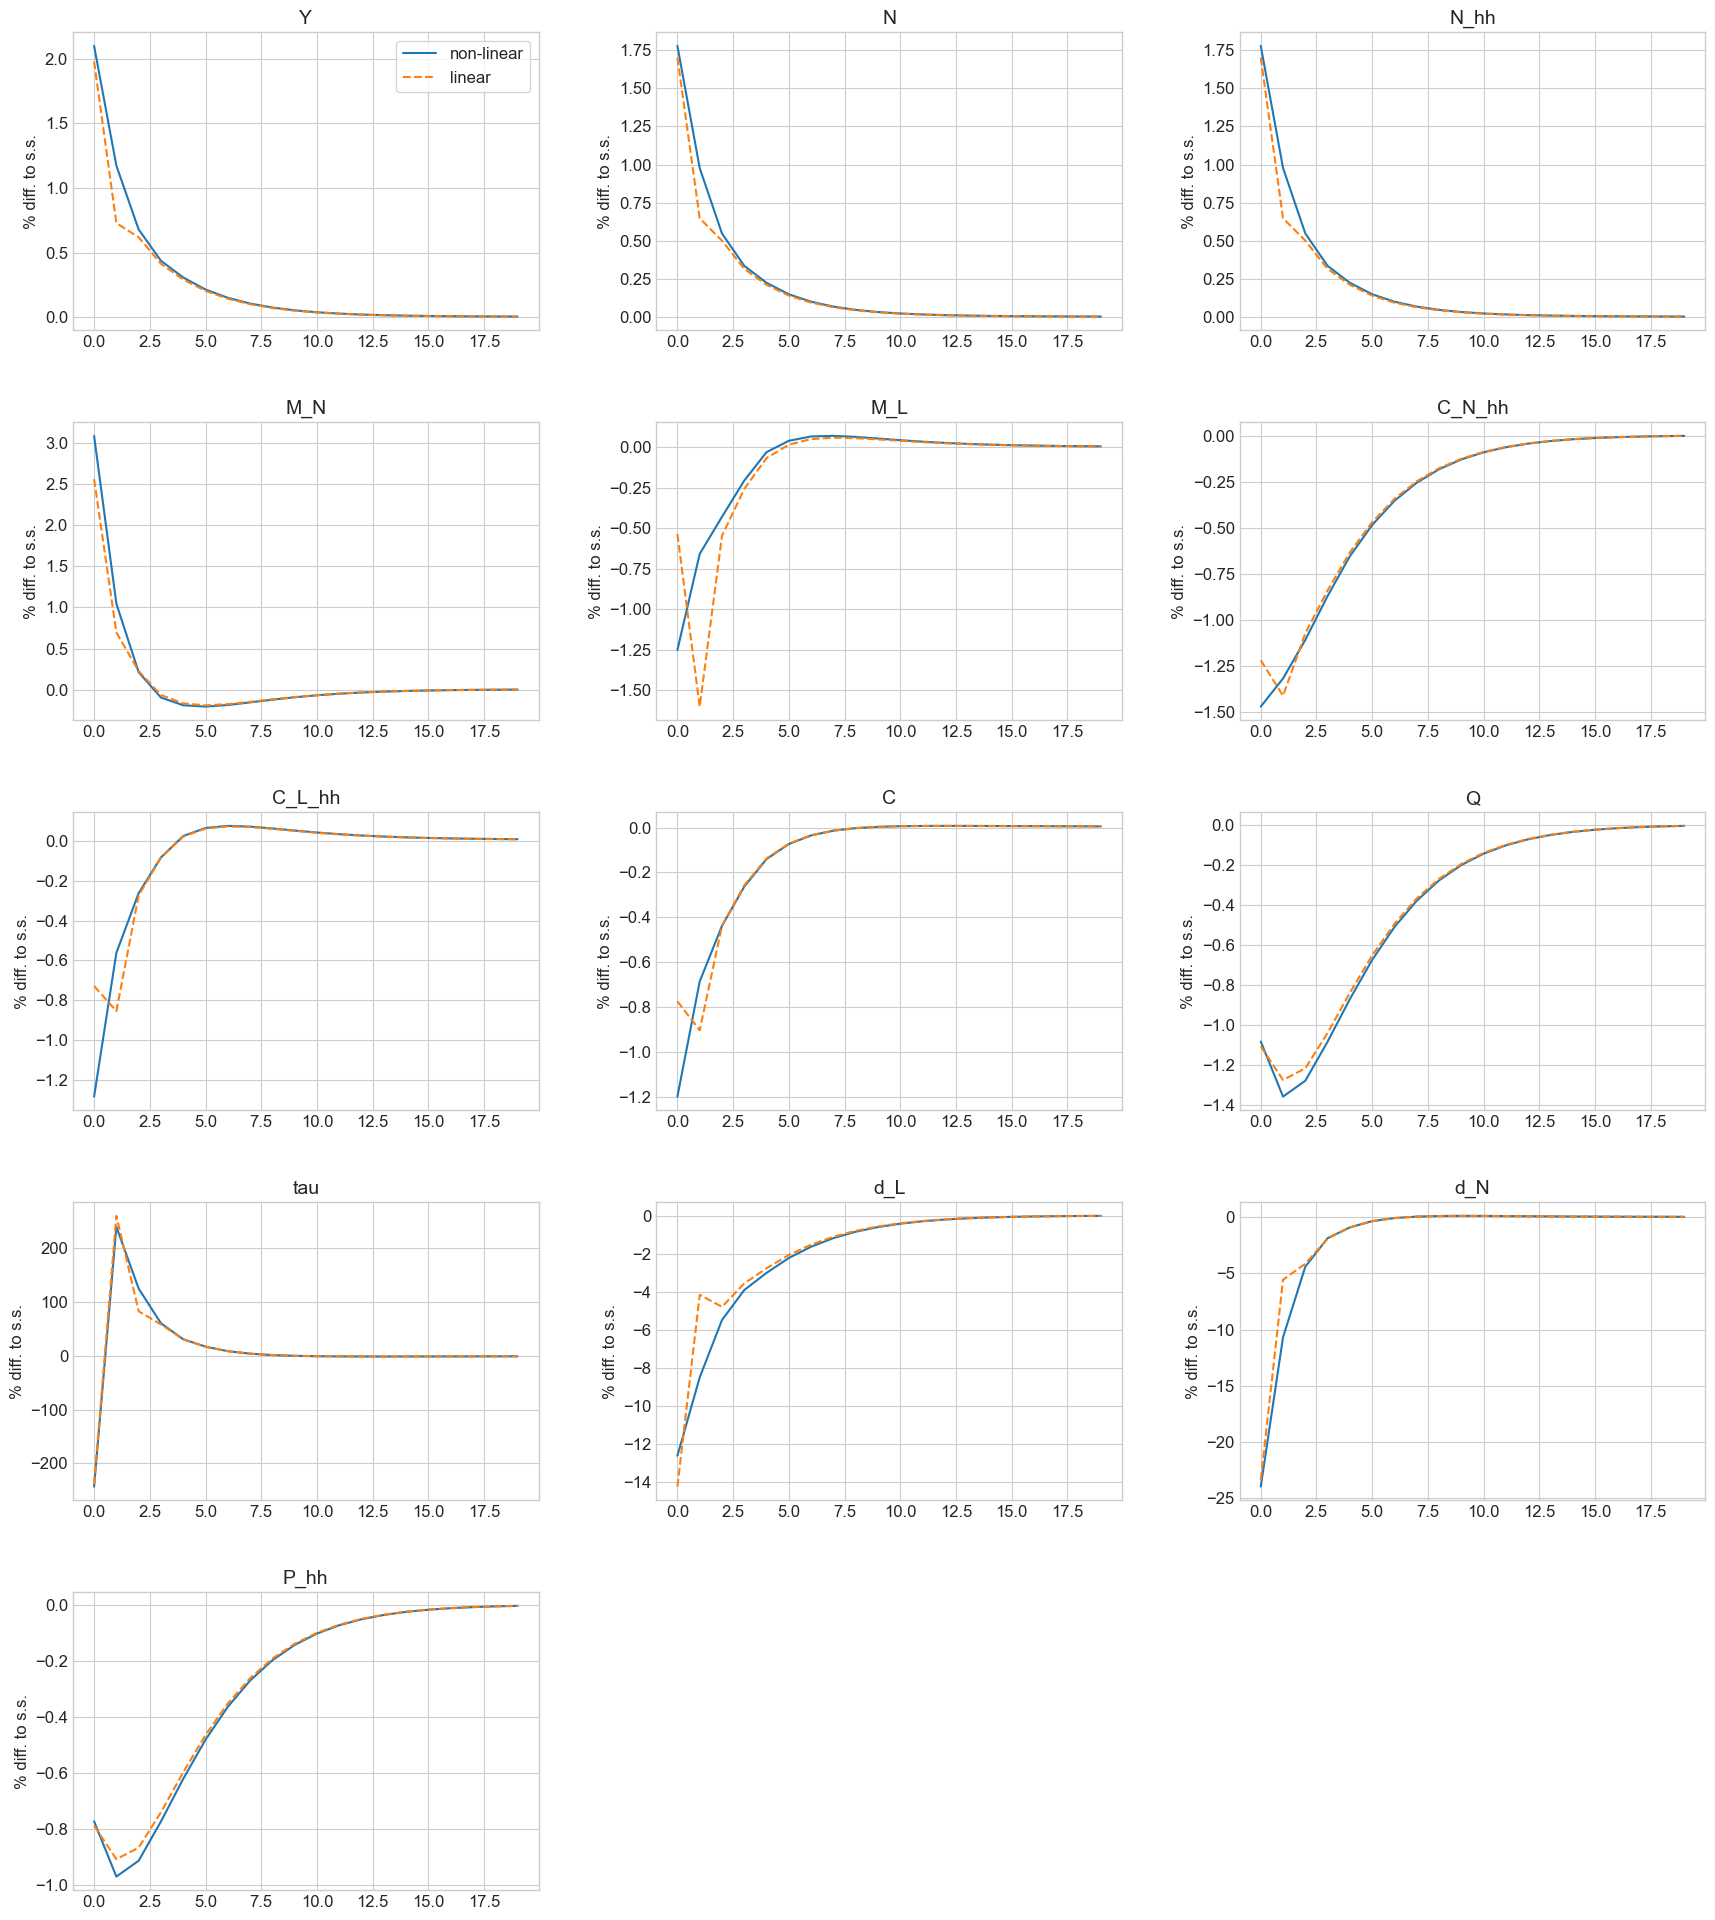


### tagets ###


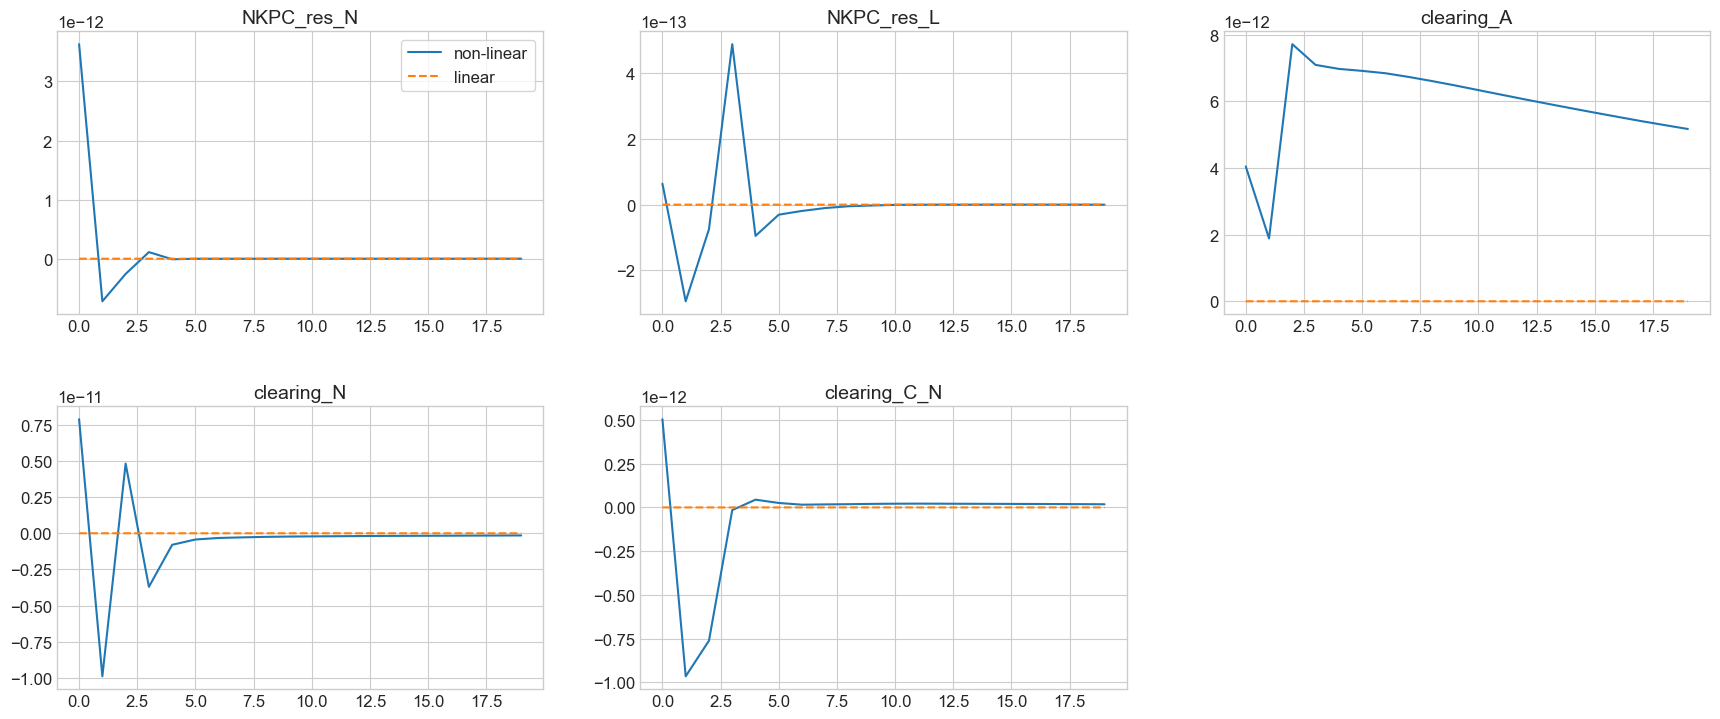

In [36]:
paths = ['Y','N','N_hh','M_N','M_L','C_N_hh','C_L_hh','C','Q','tau','d_L','d_N','P_hh']
model.show_IRFs(paths,T_max=20,ncols=3,do_linear=True)

In [37]:
#model_ = model.copy()
#model_.par_phi_y = 1.0
#model_.find_ss
#model_.compute_jacs()
#model_.find_transition_path()

# Step 4. Simulation

In [38]:
np.random.seed(1917)
model.simulate(do_print=True)

simulation prepared in 1.0 mins 36 secs [solution matrix: 9.1 secs, households: 1.0 mins 27 secs]
aggregates simulated in 0.4 secs
household policies simulated in 23.2 secs
distribution simulated in 0.1 secs
aggregates calculated from distribution in 0.0 secs


In [39]:
def model_sim():
    
    fig = plt.figure(figsize=(12,8),dpi=100)

    ax = fig.add_subplot(2,2,1)
    ax.set_title('i')
    ax.plot(ss.i+sim.di,ls='--')
    ax.axhline(ss.i,color='black',zorder=0)

    ax = fig.add_subplot(2,2,2)
    ax.set_title('pi')
    ax.plot(ss.pi+sim.dpi,ls='--',)
    ax.axhline(ss.pi,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,3)
    ax.set_title('r')
    ax.plot(ss.r+sim.dr,ls='--',)
    ax.axhline(ss.r,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,4)
    ax.set_title('C')
    ax.plot(ss.C+sim.dC,ls='--',)
    ax.axhline(ss.C,color='black',zorder=0)
    

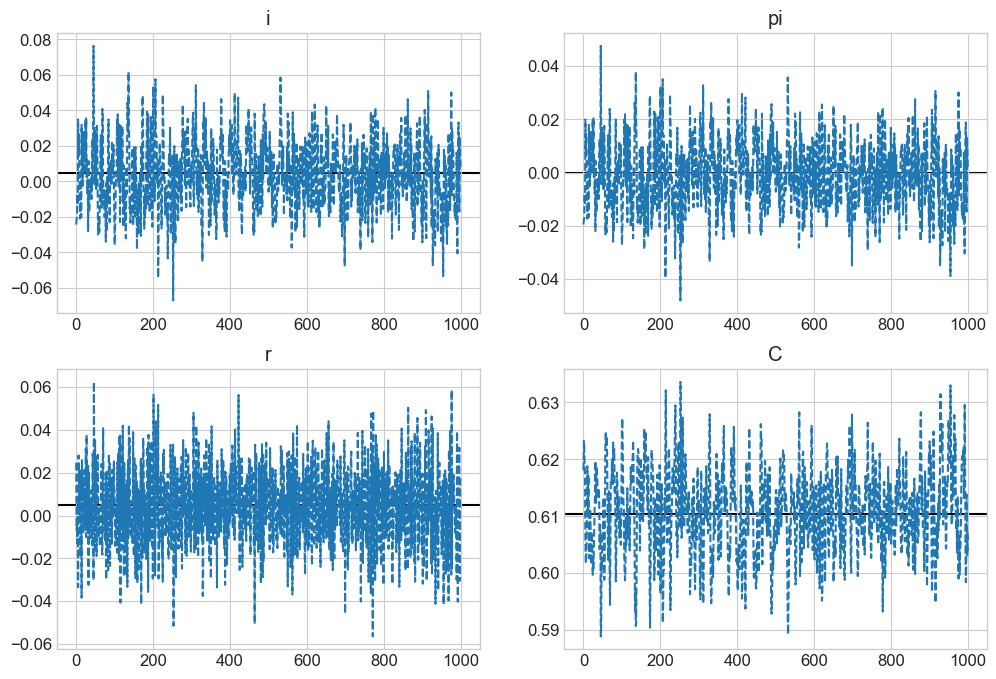

In [40]:
model_sim()